In [16]:
import polars as pl
import matplotlib.pyplot as plt
from pathlib import Path
import re
import numpy as np

In [4]:
current_dir: Path = Path.cwd().resolve()

In [25]:
dfs: list[pl.DataFrame] = []
instance_regex: re.Pattern = re.compile(r"^(\d+)w(\d+)u_requests.csv")
for file in current_dir.joinpath("data").glob("*.csv"):
    instances: int = int(instance_regex.match(file.name).group(1))
    users_amount: int = int(instance_regex.match(file.name).group(2))
    df: pl.DataFrame = (
        pl.read_csv(file, has_header=True)
        .filter(pl.col('Name') == pl.lit("Aggregated"))
        .select(['95%', 'Requests/s'])
        .with_columns(
            pl.lit(instances).alias('instances').cast(pl.Int64),
            pl.lit(users_amount).alias('users_amount').cast(pl.Int64)
        )
    )
    dfs.append(df)

In [11]:
columns_to_plot: list[str] = ['95%', 'Requests/s', 'instances', 'users_amount']

In [33]:
plots_df: pl.DataFrame = (
    pl.concat(dfs)
    .sort(['instances', 'users_amount'])
)

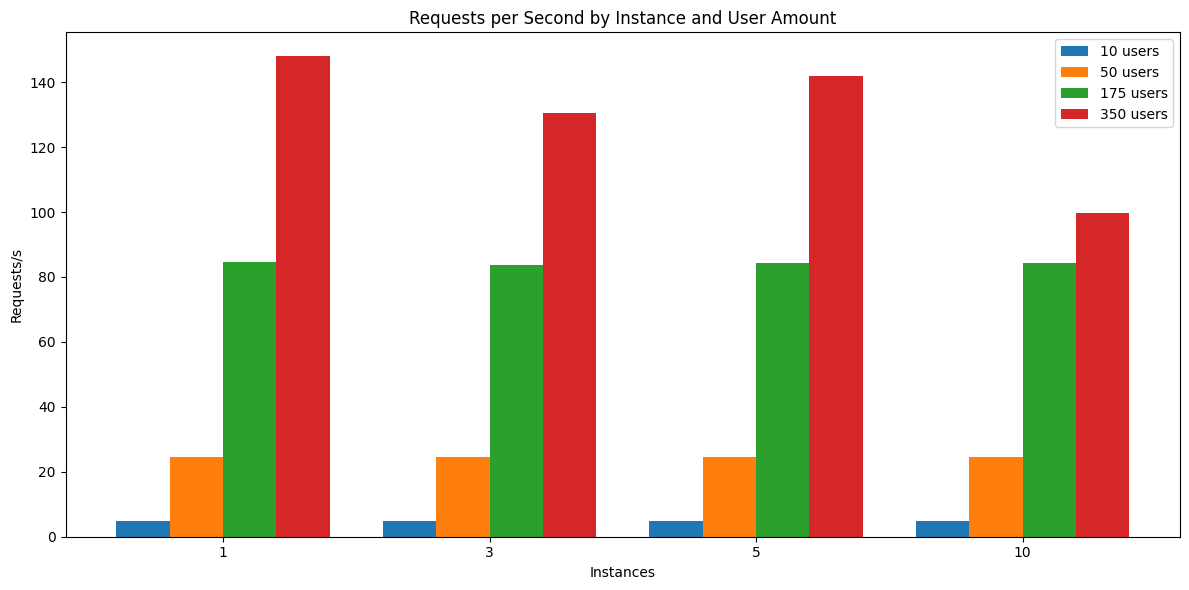

In [39]:
# Prepare data
user_amounts = [10, 50 , 175, 350]
instances = [1, 3, 5, 10]

# Set up bar positions
x = np.arange(len(instances))
width = 0.2  # Width of each bar
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar for each user amount
for user_amount in user_amounts:
    data = plots_df.filter(pl.col('users_amount') == user_amount)
    offset = width * multiplier
    ax.bar(x + offset, data['Requests/s'], width, label=f'{user_amount} users')
    multiplier += 1

ax.set_xlabel('Instances')
ax.set_ylabel('Requests/s')
ax.set_title('Requests per Second by Instance and User Amount')
ax.set_xticks(x + width * (len(user_amounts) - 1) / 2)
ax.set_xticklabels(instances)
ax.legend(loc='best')
plt.tight_layout()
plt.savefig('./resultados/req-s_by_instance.pdf', format='pdf')
plt.show()

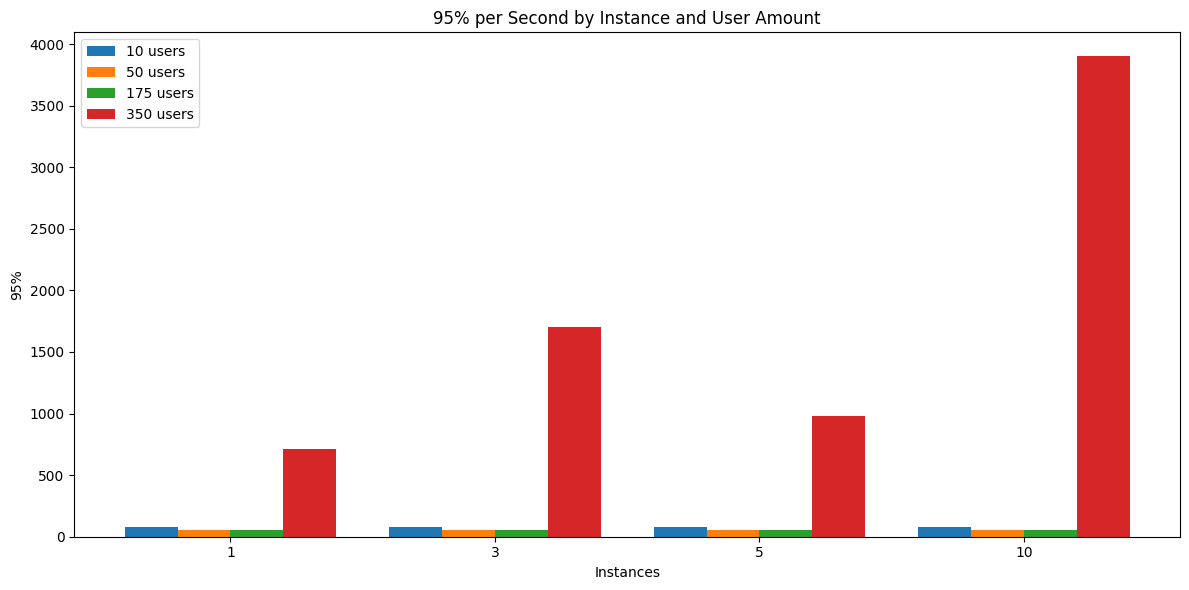

In [38]:
# Prepare data
user_amounts = [10, 50 , 175, 350]
instances = [1, 3, 5, 10]

# Set up bar positions
x = np.arange(len(instances))
width = 0.2  # Width of each bar
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar for each user amount
for user_amount in user_amounts:
    data = plots_df.filter(pl.col('users_amount') == user_amount)
    offset = width * multiplier
    ax.bar(x + offset, data['95%'], width, label=f'{user_amount} users')
    multiplier += 1

ax.set_xlabel('Instances')
ax.set_ylabel('95%')
ax.set_title('95% per Second by Instance and User Amount')
ax.set_xticks(x + width * (len(user_amounts) - 1) / 2)
ax.set_xticklabels(instances)
ax.legend(loc='best')
plt.tight_layout()
plt.savefig('./resultados/95%_by_instance.pdf', format='pdf')
plt.show()